In [1]:
# import glob
# import re
# dataFile = []

# files = glob.glob('template/*/v2/*.jpg', recursive=True)  
# for file in files:
#     #print(file)
#     tmp = file.replace('template\\', '').replace('v2\\', '')
#     nominal_value = tmp.split('\\')[0]
#     print("Nominal value:", nominal_value)
#     print(tmp)    
#kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
import numpy as np
for scale in np.linspace(0.2, 1.0, 10)[::-1]:
    print(scale)

1.0
0.9111111111111112
0.8222222222222222
0.7333333333333334
0.6444444444444445
0.5555555555555556
0.4666666666666667
0.37777777777777777
0.2888888888888889
0.2


In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

(780, 1038)
size template: width:  277 height:  117
nilai max (83, 256)
nilai min: (100, 274)
nilai max val: 54679308.0
nilai min val: -20891472.0
(360, 373)


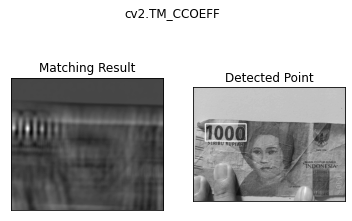

nilai max (83, 256)
nilai min: (100, 274)
nilai max val: 0.6447517275810242
nilai min val: -0.24835209548473358
(360, 373)


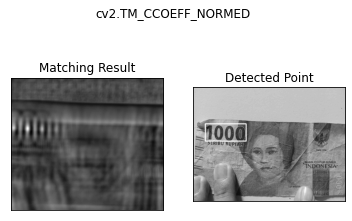

nilai max (0, 17)
nilai min: (276, 630)
nilai max val: 789999040.0
nilai min val: 354591104.0
(277, 134)


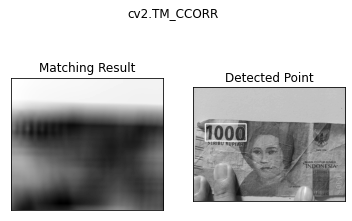

nilai max (83, 256)
nilai min: (100, 274)
nilai max val: 0.9376111030578613
nilai min val: 0.781217098236084
(360, 373)


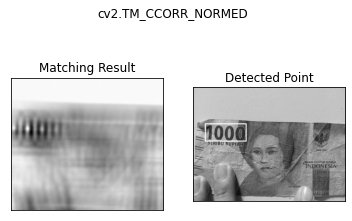

nilai max (0, 11)
nilai min: (83, 256)
nilai max val: 269714304.0
nilai min val: 66882944.0
(360, 373)


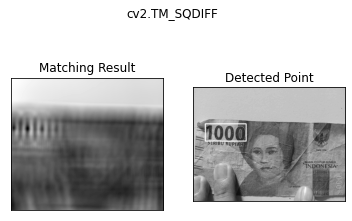

nilai max (100, 275)
nilai min: (83, 256)
nilai max val: 0.44830256700515747
nilai min val: 0.1271277815103531
(360, 373)


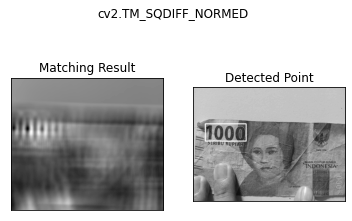

In [5]:
img = cv2.imread('test/1000_baru.jpg', cv2.IMREAD_GRAYSCALE)
print(img.shape)
assert img is not None, "file could not be read, check with os.path.exists()"
img2 = img.copy()
template = cv2.imread('template/1000/v2/nominal.jpg', cv2.IMREAD_GRAYSCALE)
assert template is not None, "file could not be read, check with os.path.exists()"
w, h = template.shape[::-1]
print('size template: width: ',w,'height: ',h)
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    print('nilai max', max_loc)
    print('nilai min:', min_loc)
    print('nilai max val:', max_val)
    print('nilai min val:', min_val)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    print(bottom_right)
    cv2.rectangle(img,(83, 256), (360, 373), 255, 6)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()
    cv2.waitKey(10)
    cv2.destroyAllWindows()